# Pymaceuticals Inc.
---

### Analysis
The data of the 249 mice that were treated for SCC with 10 different treatments had a similar sample size, each with a mean and median that were close to each other.  Each sample size, except for Capomulin and Ramicane, had an average tumor volume of around 50 mm3.  Capomulin and Ramicane had a smaller average - both around 40 mm3, though the sample groups receiving Capomulin and Ramicane each had a larger number of mice in their samples. 

Four treatments were selected to perform further analysis: Capomulin, Ramicane, Infubinol and Ceftamin.  The studies determined that only one of these treatments had an outlier for the tumor volume - Infubinol.   That had a tumor volume approximately 24 mm3's lower than the average tumor volume at the end of the treatment.

Boxplots of these four treatments showed that Capomulin and Ramicane had the lowest tumor volumes at the 45 day timepoint.  When the treatment of one mouse was reviewed, it showed a gradual increase of the tumor volume, and then a deep decline between days 20 and 35.  Capomulin may be responsible for the decrease in this mouses tumor volume, though further evidence is needed to review the tumor volume after day 45 as it appeared to be climbing.

There is a strong correlation between mouse weight and tumor volume - the higher the weight for the mouse, the larger the tumor volume.

I am unsure aat this point in how comfortable I am with the treatments as there was a climb at the 45 day mark and would need further data to evaluate.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete_df.head(1000)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
995,t994,20,56.527952,1,Placebo,Male,14,30
996,a788,20,54.060983,1,Zoniferol,Male,5,30
997,c895,20,53.676840,2,Infubinol,Female,7,29
998,l897,20,44.813093,0,Capomulin,Male,17,19


In [2]:
# Checking the number of mice.
mouse_total = mouse_metadata['Mouse ID'].nunique()
print(mouse_total)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#unique_mouse_data = mouse_data_complete_df.groupby(['Mouse ID', 'Timepoint']).first().reset_index()

# Display the duplicate mice
duplicate_mice = mouse_data_complete_df.loc[mouse_data_complete_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()


# Print the duplicate mice
duplicate_mice


array(['g989'], dtype=object)

In [4]:

# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = mouse_data_complete_df.loc[mouse_data_complete_df["Mouse ID"] == "g989"]
duplicate_mice_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_complete_df = mouse_data_complete_df[mouse_data_complete_df['Mouse ID'].isin(duplicate_mice)==False]
mouse_data_complete_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mouse_unique = mouse_data_complete_df['Mouse ID'].nunique()
new_mouse_unique

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = mouse_data_complete_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Rename the columns
summary_stats = summary_stats.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std Deviation",
    "sem": "Tumor Volume Std Err"
})

# Display the summary statistics table
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Deviation,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = mouse_data_complete_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

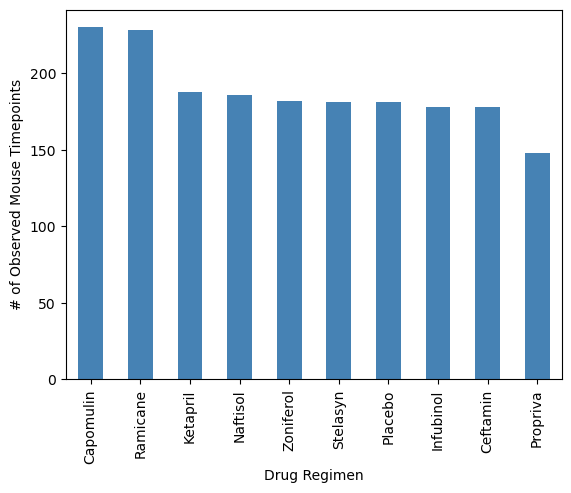

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
unique_mouse_data = mouse_data_complete_df.groupby(['Mouse ID', 'Timepoint']).first()
regimen_counts = mouse_data_complete_df['Drug Regimen'].value_counts()

regimen_bar = regimen_counts.plot(kind='bar', ylabel='# of Observed Mouse Timepoints', xlabel ='Drug Regimen', color='steelblue')




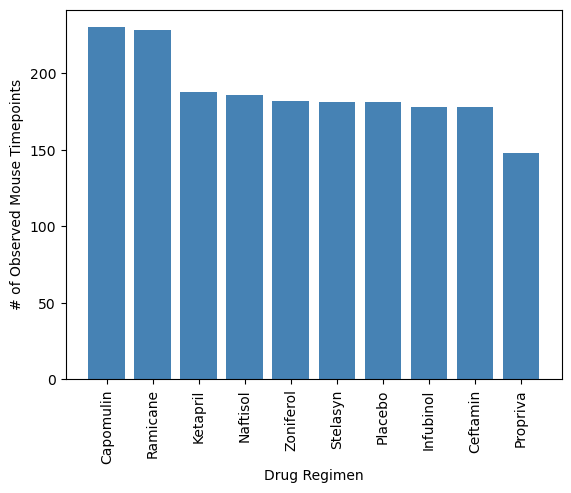

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count the number of rows for each drug regimen
regimen_counts = mouse_data_complete_df['Drug Regimen'].value_counts()

# Create the bar plot
plt.bar(regimen_counts.index, regimen_counts.values, color='steelblue')

# Set the x-axis and y-axis labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

# Display the plot
plt.show()



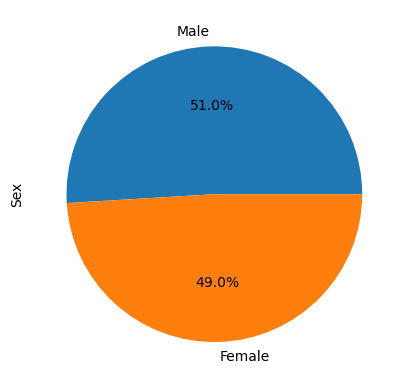

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts_df = mouse_data_complete_df["Sex"]
sex_counts_df.value_counts().plot(kind='pie', autopct='%1.1f%%')
ax = sex_counts_df.plot.pie


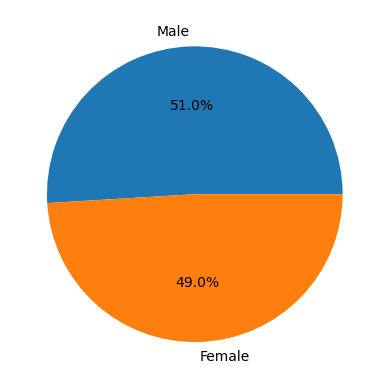

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts_df.value_counts(), labels=sex_counts_df.value_counts().index, autopct='%1.1f%%')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = mouse_data_complete_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_data = pd.merge(last_timepoints, mouse_data_complete_df, on=['Mouse ID', 'Timepoint'], how='left')

regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = merge_data[merge_data['Drug Regimen'].isin(regimens)]
final_tumor_volume.head(50)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
10,a520,45,38.810366,1,Ramicane,Male,13,21
11,a577,30,57.031862,2,Infubinol,Female,6,25
12,a644,45,32.978522,1,Ramicane,Female,7,17
13,a685,45,66.083066,3,Infubinol,Male,8,30
19,b128,45,38.982878,2,Capomulin,Female,9,22


In [14]:
# Put treatments into a list for the for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatment_data = []
potential_outliers={}

# Calculate the IQR and quantitatively determine if there are any potential outliers for each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # Calculate quartiles and bounds for the current treatment regimen
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    # Store the outliers in a dictionary
    potential_outliers[treatment] = outliers

# Print the potential outliers
for treatment, outliers in potential_outliers.items():
    print(f"{treatment}'s potential outliers:\n{outliers}\n")


Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)



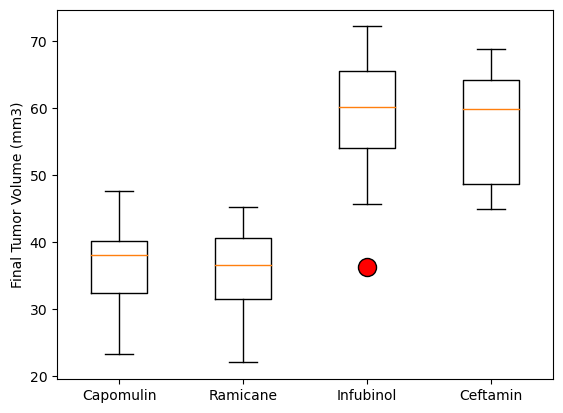

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatment_data = [final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]

plt.boxplot(treatment_data, labels=treatments, showfliers=True, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize' : '13'})

plt.ylabel('Final Tumor Volume (mm3)')

# Display the plot
plt.show()


Line and Scatter Plots

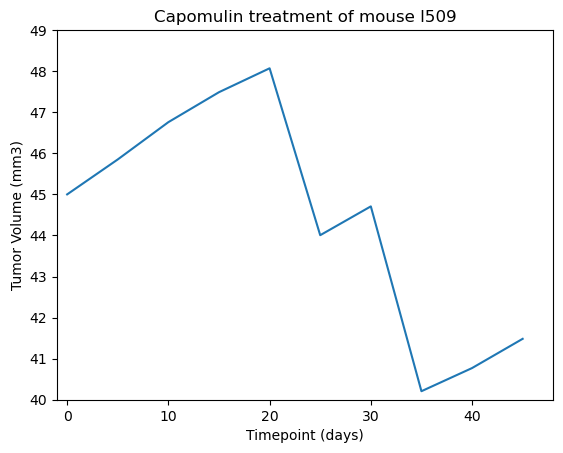

In [16]:
# Specify the mouse ID and treatment
mouse_id = "l509"

# Filter the data for the specified mouse and treatment
mouse_data = mouse_data_complete_df[(mouse_data_complete_df["Mouse ID"] == mouse_id)]

# Extract the tumor volume and time points
tumor_volume = mouse_data["Tumor Volume (mm3)"]
timepoints = mouse_data["Timepoint"]

# Generate the line plot
plt.plot(timepoints, tumor_volume)

# Set the labels and title
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse {mouse_id}")

# Set the x-axis and y-axis limits
plt.xlim(-1, 48)
plt.ylim(40, 49)

# Display the plot
plt.show()


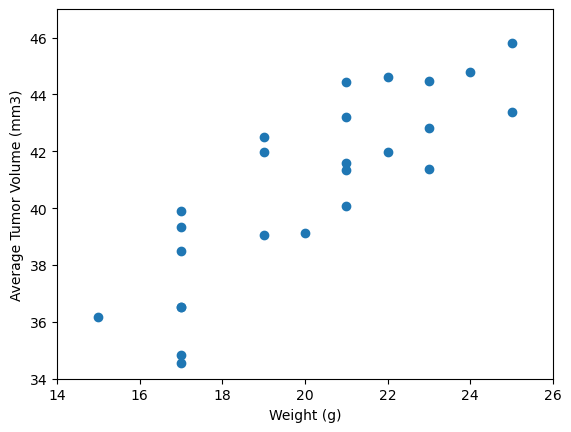

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug = "Capomulin"

# Filter the data for the specified drug regimen
capomulin_data = mouse_data_complete_df[mouse_data_complete_df["Drug Regimen"] == drug]

# Calculate the average tumor volume and mouse weight for each mouse
average_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Generate the scatter plot
plt.scatter(mouse_weight, average_tumor_vol)

# Set the labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Set the x-axis and y-axis limits
plt.xlim(14, 26)
plt.ylim(34, 47)

# Display the plot
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor size is 0.84


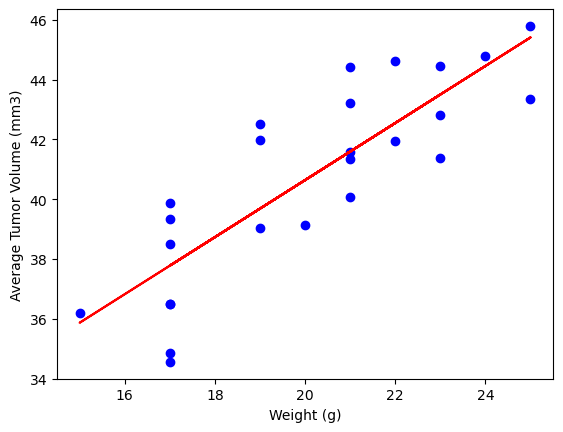

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

print(f"The correlation coefficient between mouse weight and average tumor size is {round(st.pearsonr(mouse_weight,average_tumor_vol)[0],2)}")

#import scipy.stats as st
from sklearn.linear_model import LinearRegression

# Filter the data for the Capomulin regimen
capomulin_data = mouse_data_complete_df[mouse_data_complete_df["Drug Regimen"] == "Capomulin"]

# Group the data by mouse ID and calculate the average tumor volume and mouse weight
grouped_data = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"}).reset_index()

# Extract the mouse weight and average tumor volume
mouse_weight = grouped_data["Weight (g)"]
average_tumor_vol = grouped_data["Tumor Volume (mm3)"]

# Create and fit the linear regression model
regressor = LinearRegression()
X = mouse_weight.values.reshape(-1, 1)
y = average_tumor_vol.values.reshape(-1, 1)
regressor.fit(X, y)

# Predict the tumor volume using the weight values
y_pred = regressor.predict(X)

# Visualize the results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
